1. Understanding Business Problem

Our business case is to predict customer charges for an insurance company based on given variables. So that the company can decide how much they charge people correctly.

2. Variable Description

After understanding the business case, we need to know our variables before analyzing them. Thus we have a clear understanding as we go further.

We will use parameters from the dataset

Age: Age of the primary beneficiary Sex: Insurance contractor gender, female, male BMI: Body mass index, providing an understanding of the body, weights that are relatively high or low relative to height, an objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 Children: Number of children covered by health insurance / Number of dependents Smoker: Smoking Region: the beneficiary’s residential area in the US, northeast, southeast, southwest and northwest. Charges: Individual medical costs billed by health insurance

3. Data Understanding

importing necessary library required and understanding the dataset

In [8]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization

import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


df.describe() method generates descriptive statistics for us. For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50(median) and upper percentiles.

We can easily notice that the minimum age is 18 and the maximum age is 64. We can also see mean and median values of age are almost the same.

I also noticed that the maximum charge value is 63.770 which might be an unusual value. We can investigate this in the data visualization part.

( With describe method, we can also understand if our data is skewed or not looking at the range of quantiles )

In [10]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


We see that the most frequent value for sex is male and shown in the dataset 676 times.

There are 4 unique regions in our dataset and the most frequent value is southeast and 364 times counted in the data.

Most people are not smokers with a number of 1064 observations.

4. Data Cleaning

In this part of the EDA. We will check ;

Missing Values
Duplicated Values
The purpose of data cleaning is to get our data ready to analyze and visualize.

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

When combining .isnull() method with .sum() we can sum up all the missing values for each variables.

Luckily, there are no missing values in this dataset. We will now proceed to analyze the data, observe patterns, and identify outliers with the help of visualization methods.

most datasets contains missing values so checking for missing values is must.

Now we will look for duplicated values.

In [12]:
df[df.duplicated(keep='first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Dataset has only one duplicated observation. We can simply drop this row using the drop_duplicates() method.

In [13]:
df.drop_duplicates(keep ='first', inplace = True)

5. Data Visualization

Now, We understood our dataset in general and checked the missing values. We also deleted duplicated values from the data frame.

The next part of this journey is data visualization! Our goal is to perform univariate, bivariate and multivariate analysis to see the distribution and relationship between variables.

We will use the seaborn library for statistical data visualization. Seaborn is a data visualization library based on matplotlib and my favorite with ease of use.

Univariate Analysis

The purpose of the univariate analysis is to understand the distribution of values for a single variable.

We can perform univariate analysis with 3 options :

Summary Statistics
Frequency Distributions Table
Charts ( Boxplot, Histogram, Barplot, Pie Chart)
We will perform univariate analysis by using visualization techniques.

Univariate Analysis for Numerical Features

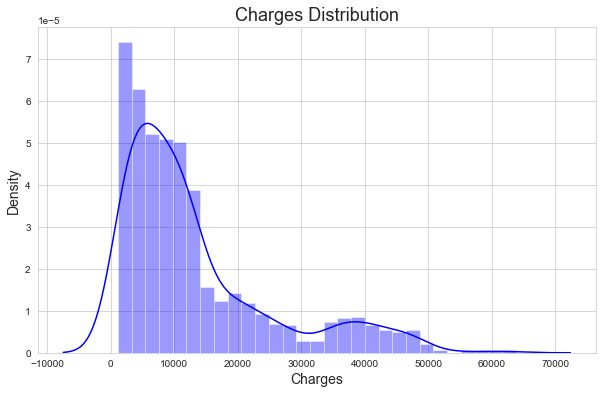

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(df.charges,color='b')
plt.title('Charges Distribution',size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()

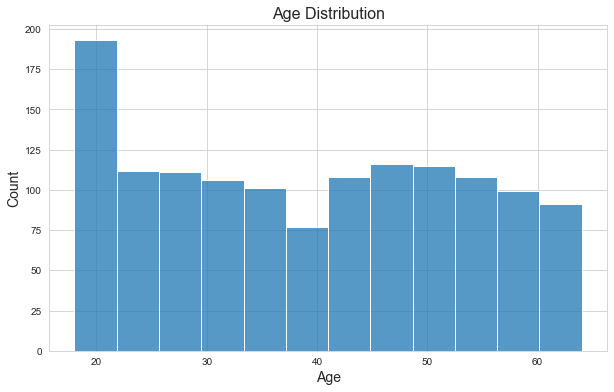

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df.age)
plt.title('Age Distribution',size=16)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

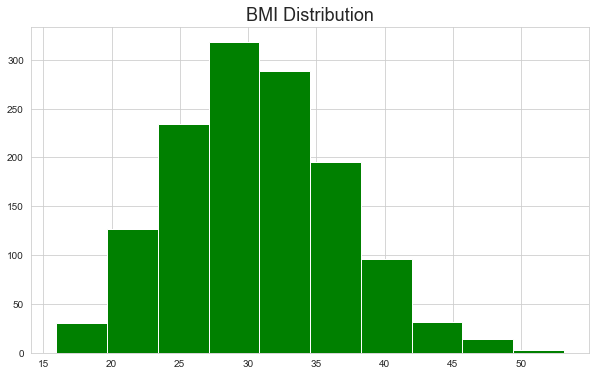

In [16]:
plt.figure(figsize = (10,6))
plt.hist(df.bmi, color= 'g')
plt.title("BMI Distribution", size=18)
plt.show()

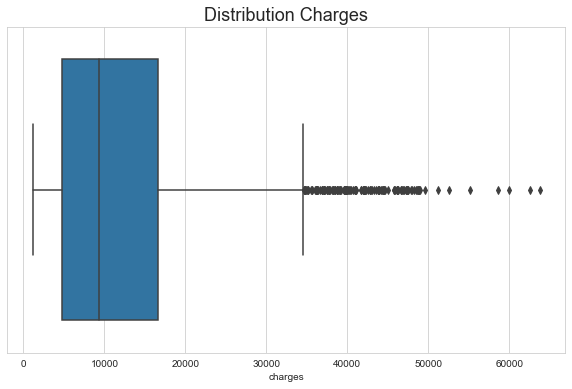

In [17]:
plt.figure(figsize = (10,6))
sns.boxplot(df.charges)
plt.title('Distribution Charges',size=18)
plt.show()

In [18]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

11911.37345


In [19]:
df[(df['charges']< Q1-1.5* IQR) | (df['charges']> Q3+1.5* IQR)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


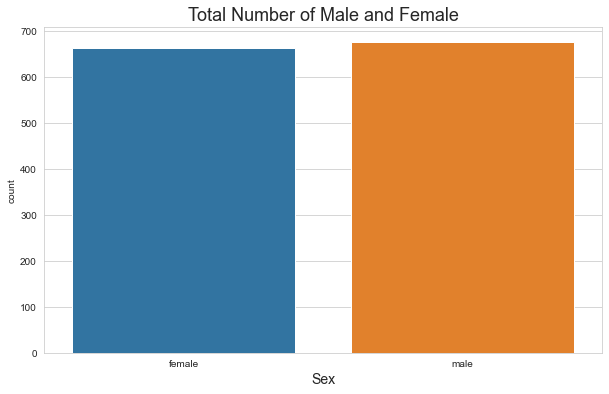

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'sex', data = df)
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Sex',size=14)
plt.show()

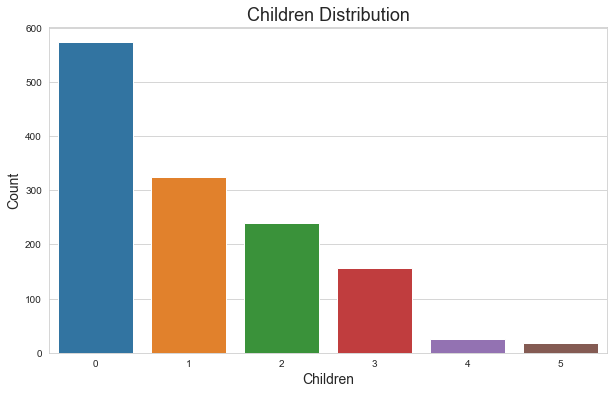

In [21]:
child_counts = df.children.value_counts()

# Create a bar plot of the child counts
plt.figure(figsize=(10, 6))
sns.barplot(x=child_counts.index, y=child_counts.values)
plt.title('Children Distribution', size=18)
plt.xlabel('Children', size=14)
plt.ylabel('Count', size=14)
plt.show()

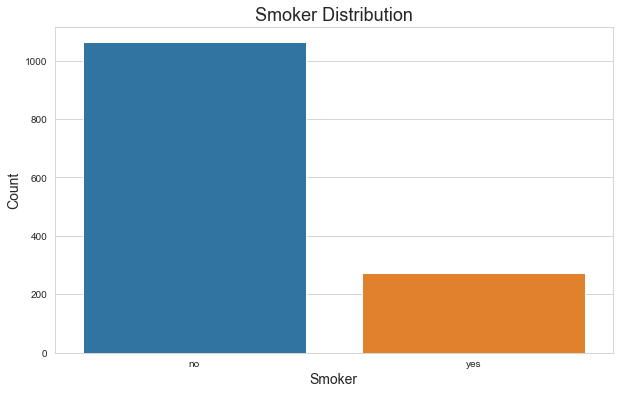

In [22]:
smoker_count = df.smoker.value_counts()

# Create a bar plot of the smoker count
plt.figure(figsize=(10,6))
sns.barplot(x=smoker_count.index, y=smoker_count)
plt.title('Smoker Distribution', size=18)
plt.xlabel('Smoker', size=14)
plt.ylabel('Count', size=14)
plt.show()

In [23]:
df.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

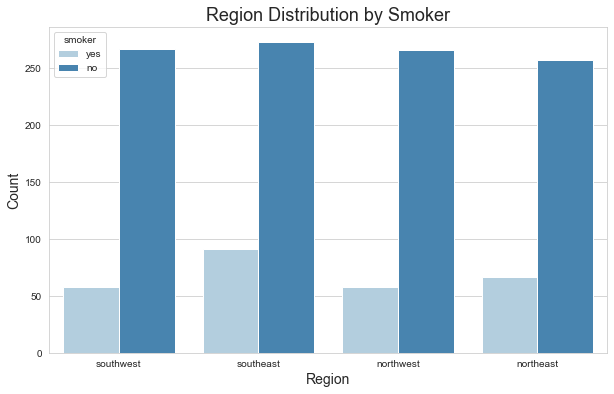

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='region', data=df, hue='smoker', palette='Blues')
plt.title('Region Distribution by Smoker', size=18)
plt.xlabel('Region', size=14)
plt.ylabel('Count', size=14)
plt.show()

Bivariate Analysis

Bivariate analysis is the analysis of exactly two variables. We will use bivariate analysis to find relationships between two variables.

For bivariate analysis, we usually use boxplot(categorical vs numerical), scatterplot(numerical vs numerical), or contingency table(categorical vs categorical).

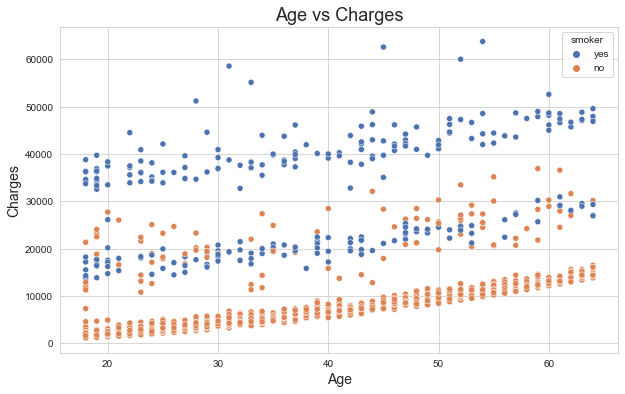

In [25]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='age',y='charges',hue='smoker', data=df, palette='deep')
plt.title('Age vs Charges',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Charges',size=14)
plt.show()

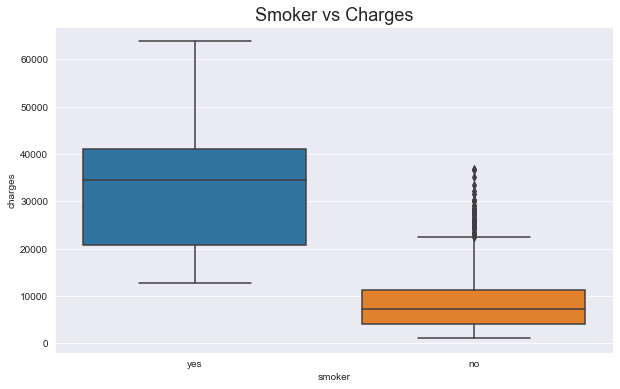

In [26]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='smoker',y='charges',data=df)
plt.title('Smoker vs Charges',size=18);

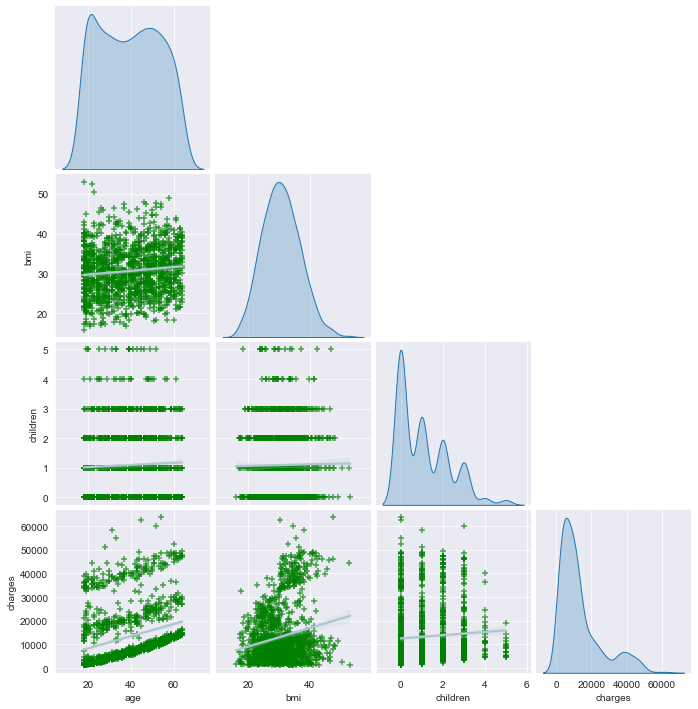

In [27]:
sns.pairplot(df, 
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'#aec6cf'}, 
                           'scatter_kws': {'alpha': 0.7, 
                                           'color': 'green'}},
                 corner=True);

Correlation

Correlation is used to test relationships between quantitative variables or categorical variables. It’s a measure of how things are related. The table above shows us how we can interpret correlation coefficients.

As we said earlier, seaborn is an awesome library that helps us visualize our variables easily and clearly. The heatmap() method shows us the relationship between numeric variables.

There are different methods to calculate correlation coefficient ;

1.Pearson 2.Kendall 3.Spearman

We will combine the .corr() method with heatmap so that we will be able to see the relationship in the graph. .corr() method is used Pearson correlation by default.

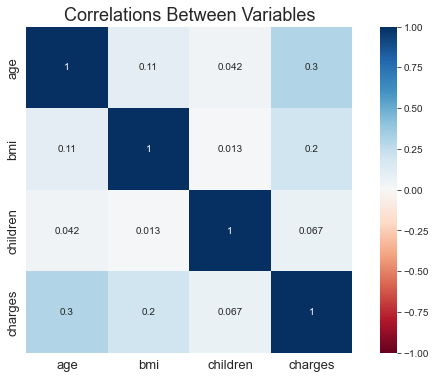

In [28]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

Conclusion

In this post, We examined our dataset using exploratory data analysis and try to understand each variable as well as their relationship with each other.

The main purpose of EDA is to help understand data before making any assumptions. EDA helps us to see distribution, summary statistics, relationships between variables and outliers.

In [31]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (16, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
medical_df = pd.read_csv('insurance.csv')
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [32]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()


In [33]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges vs Smoking')
fig.update_layout(bargap=0.1)
fig.show()

In [34]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges vs Gender')
fig.update_layout(bargap=0.1)
fig.show()

In [35]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region',  
                   title='Annual Medical Charges vs Region')
fig.update_layout(bargap=0.1)
fig.show()

In [36]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [37]:
px.histogram(medical_df, x='sex', title='Gender Distribution')

In [38]:
px.histogram(medical_df, x='region', title='Region Distribution')

In [39]:
px.histogram(medical_df, x='children', title='Childrens Distributions')


In [40]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [41]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

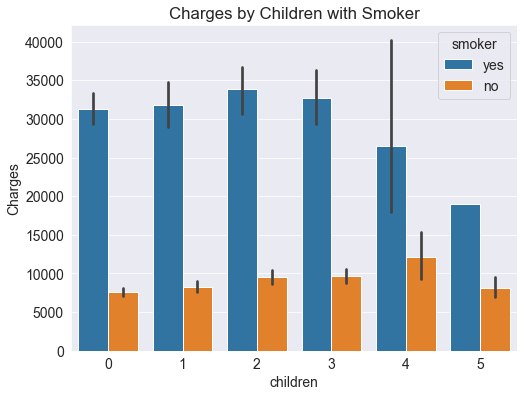

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="children", y="charges", hue="smoker", data=medical_df, ax=ax)
ax.set_ylabel("Charges")
ax.set_title("Charges by Children with Smoker")
plt.show()


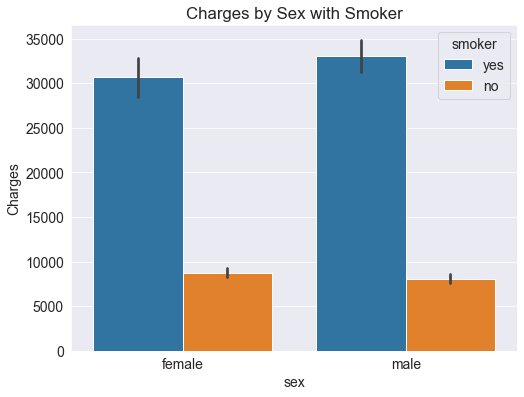

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="sex", y="charges", hue="smoker", data=medical_df, ax=ax)
ax.set_ylabel("Charges")
ax.set_title("Charges by Sex with Smoker")
plt.show()

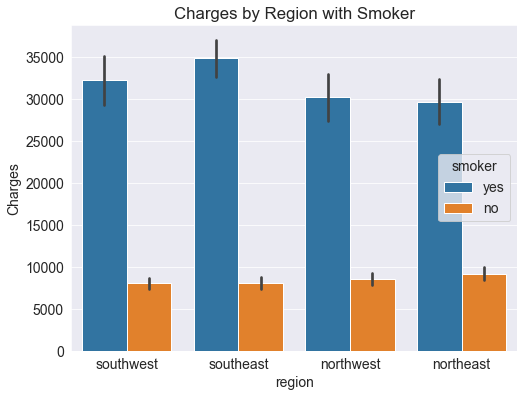

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="region", y="charges", hue="smoker", data=medical_df, ax=ax)
ax.set_ylabel("Charges")
ax.set_title("Charges by Region with Smoker")
plt.show()

Correlation
As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [45]:
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [46]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [47]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

In [48]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


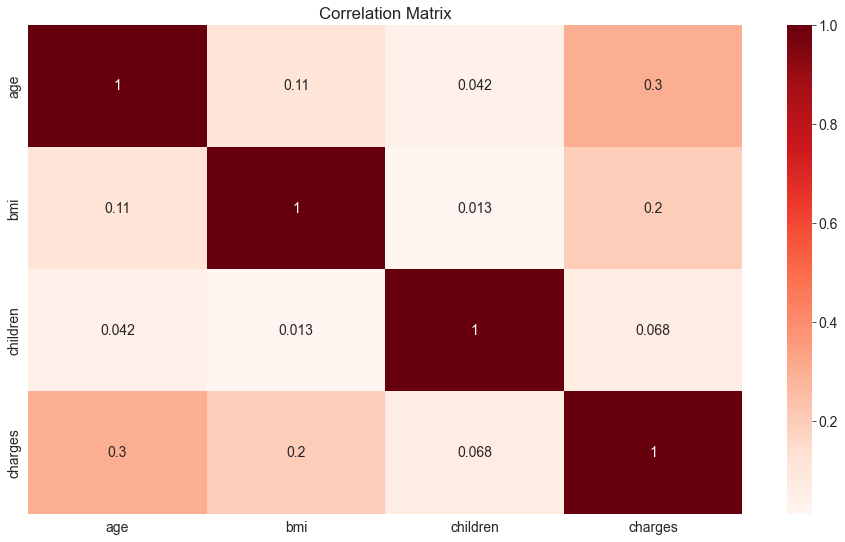

In [49]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

Linear Regression using a Single Feature
We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

NOTE: Some of the code below are just to slice the Linear Regression Model to understand the intution behind it. Just follow the explanation and not the code. A Linear model will be build at the end of the notebook. I'll hide the code just to avoid confusion

Next, let's visualize the relationship between "age" and "charges"

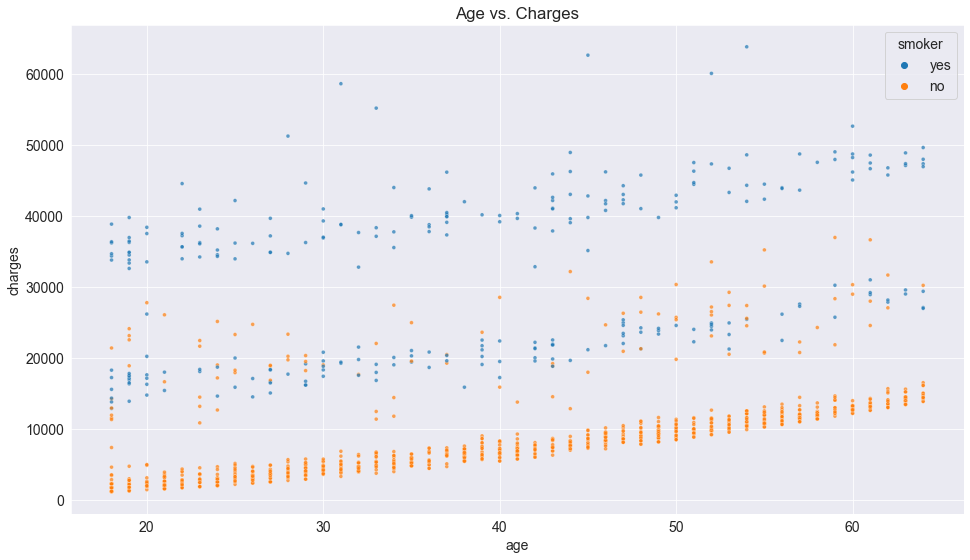

In [50]:
plt.title('Age vs. Charges')
sns.scatterplot(data=medical_df, x='age', y='charges',hue='smoker', alpha=0.7, s=15);


We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

y=wx+b
 
The line is characterized two numbers:  w
  (called "slope") and  b
  (called "intercept").

Model
In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assuming the following relationship between the two:

charges=w×age+b
 
We'll try determine  w
  and  b
  for the line that best fits the data.

This technique is called linear regression, and we call the above equation a linear regression model, because it models the relationship between "age" and "charges" as a straight line.

The numbers  w
  and  b
  are called the parameters or weights of the model.

The values in the "age" column of the dataset are called the inputs to the model and the values in the charges column are called "targets".

Let define a helper function estimate_charges, to compute  charges
 , given  age
 ,  w
  and  b
 .

In [51]:
def estimate_charges(age, w, b):
    return w * age + b
age=32
w = 50
b = 100
print("The predicted charge for the given values is:",estimate_charges(age, w, b))

The predicted charge for the given values is: 1700


In [52]:
ages=medical_df.age.head(10)
ages

0    19
1    18
2    28
3    33
4    32
5    31
6    46
7    37
8    37
9    60
Name: age, dtype: int64

In [53]:
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

0    1050
1    1000
2    1500
3    1750
4    1700
5    1650
6    2400
7    1950
8    1950
9    3100
Name: age, dtype: int64

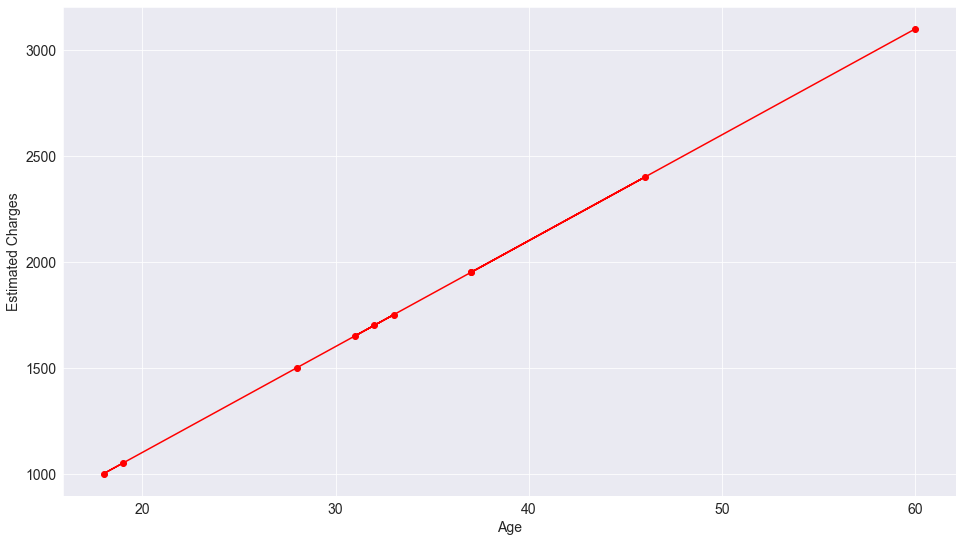

In [54]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

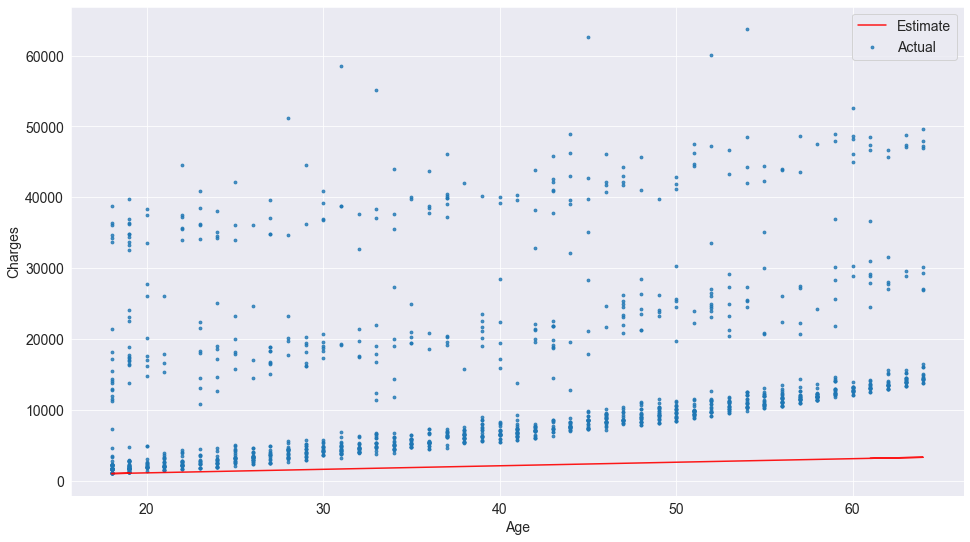

In [55]:
ages=medical_df.age
target = medical_df.charges

estimated_charges = estimate_charges(ages, w, b)

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

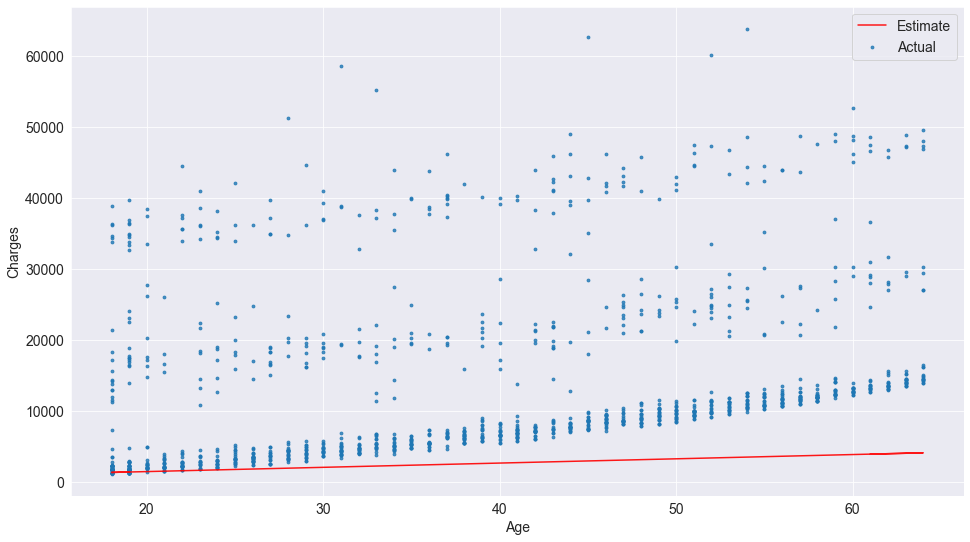

In [57]:
def try_parameters(w, b):
    ages = medical_df.age
    target = medical_df.charges
    
    def estimate_charges(age, w, b):
        return w * age + b
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
try_parameters(60, 200)


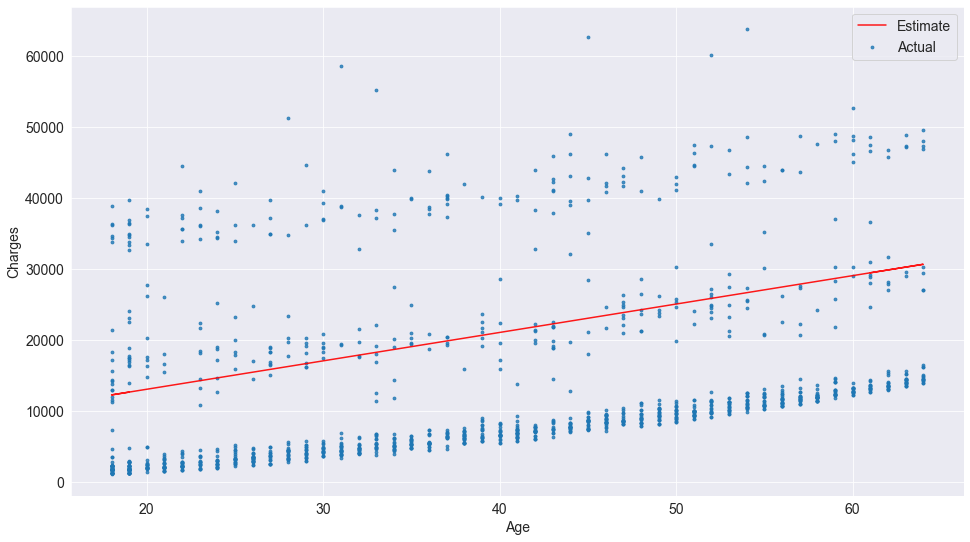

In [58]:
try_parameters(400, 5000)

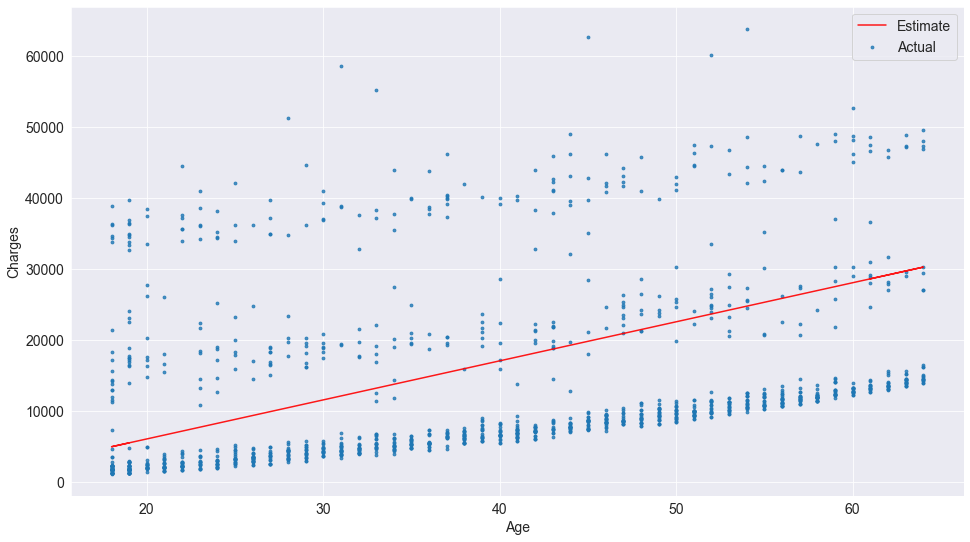

In [59]:
try_parameters(550, -5000)

As we change the values, of  w
  and  b
  manually, trying to move the line visually closer to the points, we are learning the approximate relationship between "age" and "charges".

Wouldn't it be nice if a computer could try several different values of w and b and learn the relationship between "age" and "charges"? To do this, we need to solve a couple of problems:

We need a way to measure numerically how well the line fits the points.

Once the "measure of fit" has been computed, we need a way to modify w and b to improve the the fit.

If we can solve the above problems, it should be possible for a computer to determine w and b for the best fit line, starting from a random guess.

Calculating Loss
We can compare our model's predictions with the actual targets using the following method:

Calculate the difference between the targets and predictions (the differenced is called the "residual")
Square all elements of the difference matrix to remove negative values.
Calculate the average of the elements in the resulting matrix.
Take the square root of the result

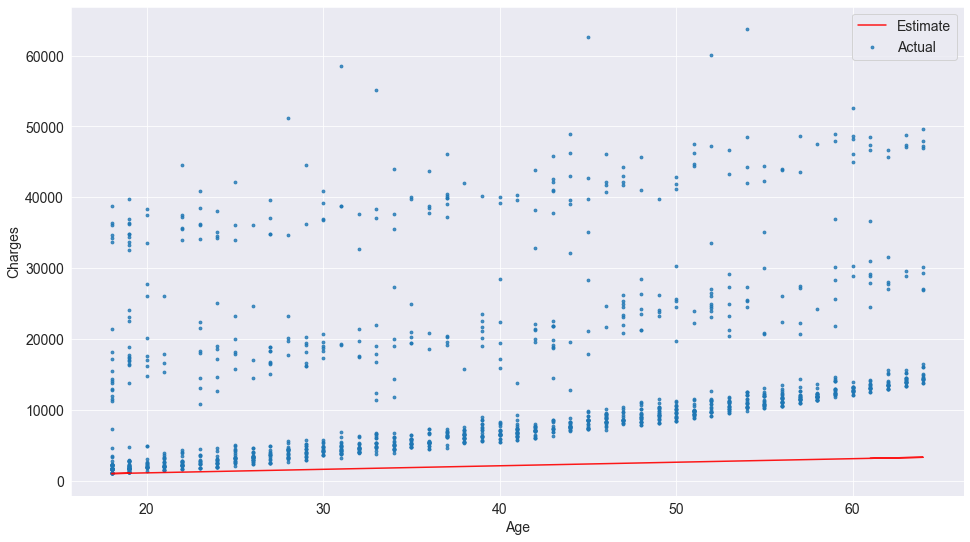

In [61]:
import numpy as np

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))
try_parameters(50, 100)

In [62]:
targets = medical_df['charges']
predicted = estimate_charges(medical_df.age, w, b)
rmse(targets, predicted)

16359.031600298242

# Machine Learning

In [64]:
from sklearn.linear_model import LinearRegression
inputs, targets = medical_df[['age']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11551.665620756306


Linear Regression using Multiple Features
So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

charges=w1×age+w2×bmi+b
 
We need to change just one line of code to include the BMI.

In [65]:
inputs, targets = medical_df[['age', 'bmi']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11374.110466839


In [66]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [67]:
fig = px.scatter(medical_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [68]:
fig = px.scatter_3d(medical_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [69]:
model.coef_, model.intercept_

(array([241.9307779 , 332.96509081]), -6424.804612240776)

In [70]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

In [71]:
fig = px.strip(medical_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

# Using Categorical Features for Machine Learning

# Binary Categories

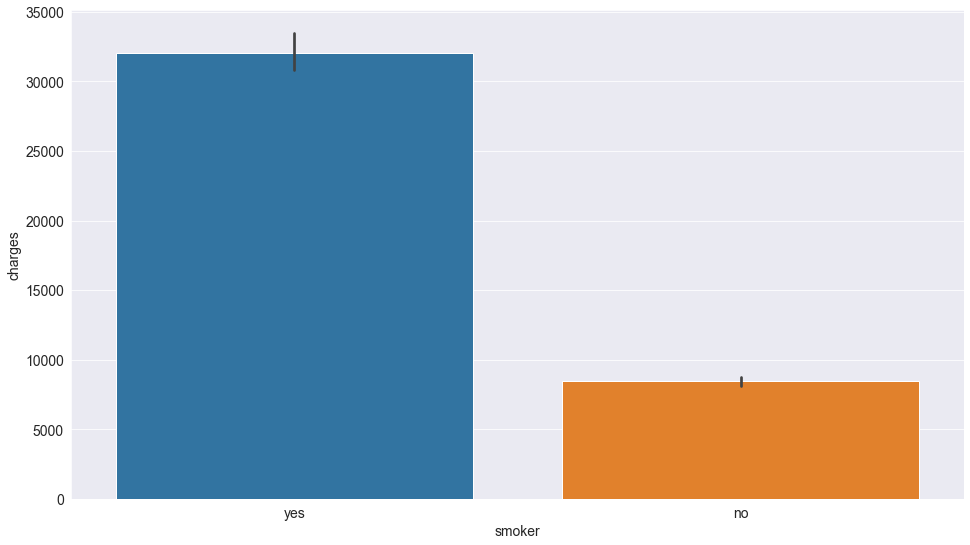

In [72]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [74]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984772

In [75]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [76]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188078


<AxesSubplot:xlabel='sex', ylabel='charges'>

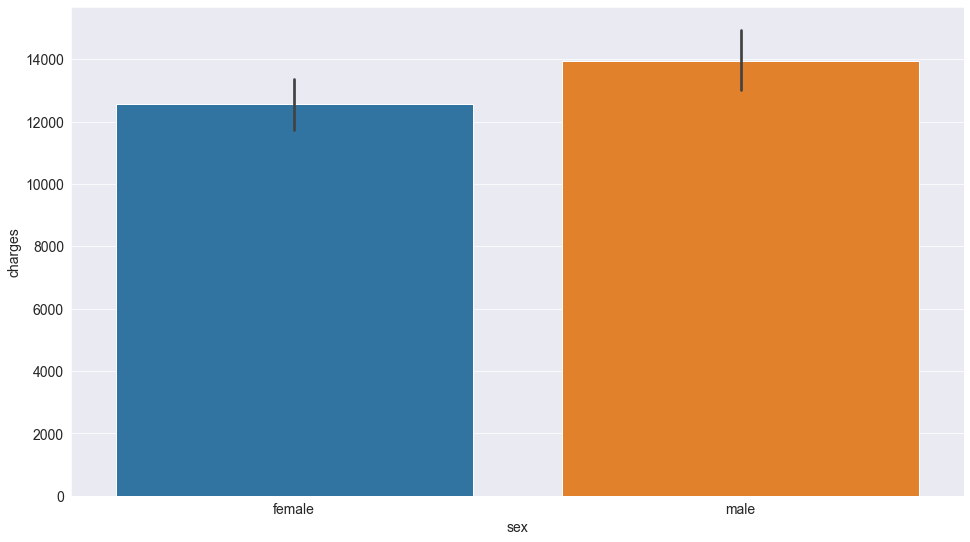

In [77]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [79]:
sex_codes = {'female': 0, 'male': 1}

medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df.charges.corr(medical_df.sex_code) #still weak coorelation

0.057292062202025415

In [80]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.1007087545395


# One-hot Encoding 

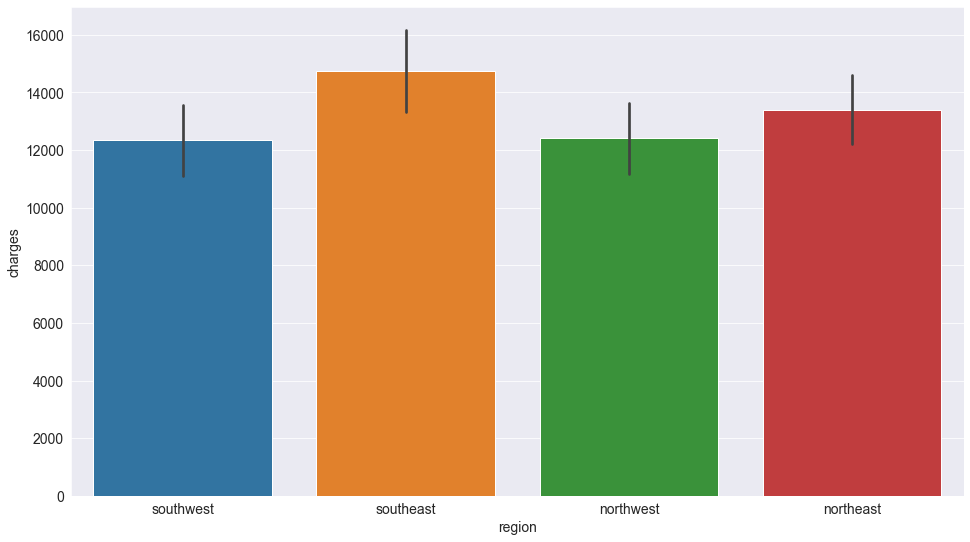

In [81]:
sns.barplot(data=medical_df, x='region', y='charges');

In [82]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [83]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [84]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [85]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']
# Since we have the original columns as well the encoded columns i'll select the encoded columns alone

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174455


# Model Improvements

In [86]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [87]:
model.intercept_

-12525.547811195454

In [88]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [89]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children'] #Scaling can be done only on numerical columns
scaler = StandardScaler()                 #This should not include converted catrgorical columns. More on this below.
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [90]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [91]:
scaler.var_ 

array([197.25385199,  37.16008997,   1.45212664])

In [92]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [93]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [94]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174455


In [95]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


# Creating a Test Set

In [96]:
from sklearn.model_selection import train_test_split

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)


In [97]:
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 7141.766224845615


In [98]:
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 5910.781498726974
